# Функция интегральной экспоненты Ei и построение ее графиков

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Версия 0.1 от 08.10.2023

Хабибуллин Ринат 2023 г.

---

In [1]:
# импортируем библиотеки для расчетов

# numpy используем для работы с массивами и подготовки данных для построения графиков. 
# Также в некоторых функциях используем возможности векторных расчетов numpy
import numpy as np

# matplotlib используем для построения графиков
import matplotlib.pyplot as plt


# scipy.special используем как альтернативный вариант расчета специальных функций
import scipy.special as sc

Функция интегральной экспоненты Ei

Для расчета значений функции Ei в python можно использовать библиотеки `scipy.special` или `mpmath`.

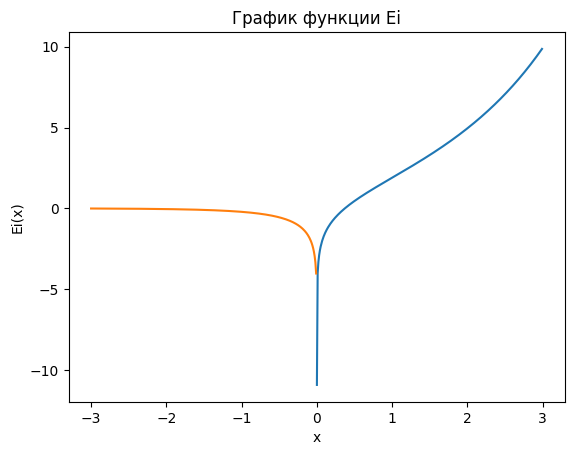

In [2]:
# для скорости и удобства используем sc.expi
# построим ветки функции для положительных и отрицательных аргументов раздельно
x = np.arange(1e-5,3,0.01)
x1 = np.arange(-3,-1e-5,0.01)

plt.plot(x, sc.expi(x))
plt.plot(x1, sc.expi(x1))
plt.title("График функции Ei")
plt.xlabel("x")
plt.ylabel("Ei(x)")
plt.show()

Для нас практический интерес будет представлять часть графика для отрицательных значений около нуля (красная линия). Для этой области хорошо работает логарифмическая аппроксимация.

Из выражения (2.2.8) для малых отрицательных значений аргумента можно получить
$$
Ei(-x) = \ln(x) + \gamma
\tag{2.2.19}
$$

где $\gamma = 0.57721566481$ - константа Эйлера

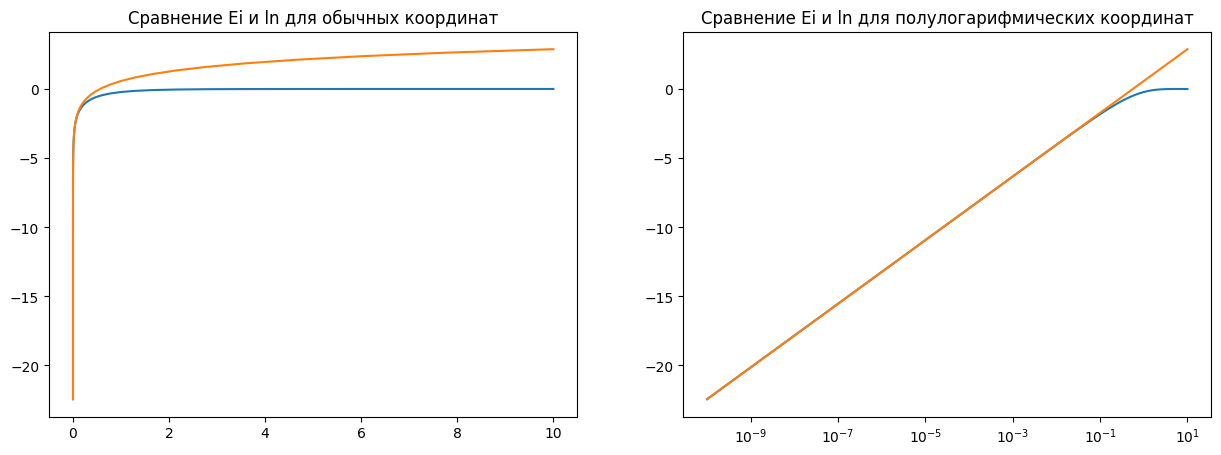

In [3]:
# зададим логарифмическое распределение точек вблизи нуля для построения графика
x = np.logspace(-10, 1, 100)

plt.rcParams["figure.figsize"] = (15,5)
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, sc.expi(-x))
ax1.plot(x, np.log(x) + 0.57721566481)
ax1.set_title('Сравнение Ei и ln для обычных координат')

ax2.plot(x, sc.expi(-x))
ax2.plot(x, np.log(x)  + 0.57721566481)
ax2.set_xscale('log')
ax2.set_title('Сравнение Ei и ln для полулогарифмических координат')

plt.show()

Задавшить определенной точностью для константы Эйлера $\gamma$ (мы взяли около 10 значащих знаков после запятой) - можно построить зависимость ошибки аппроксимации функции $Ei$ при помощи $\ln$. Удобнее отобразить эту зависимость в двойных логарифмических координатах. По ней можно определить до какого значения аргумента - ошибка будет лежать в желаемом диапазоне.

<positron-console-cell-4>:9: SyntaxWarning: invalid escape sequence '\l'


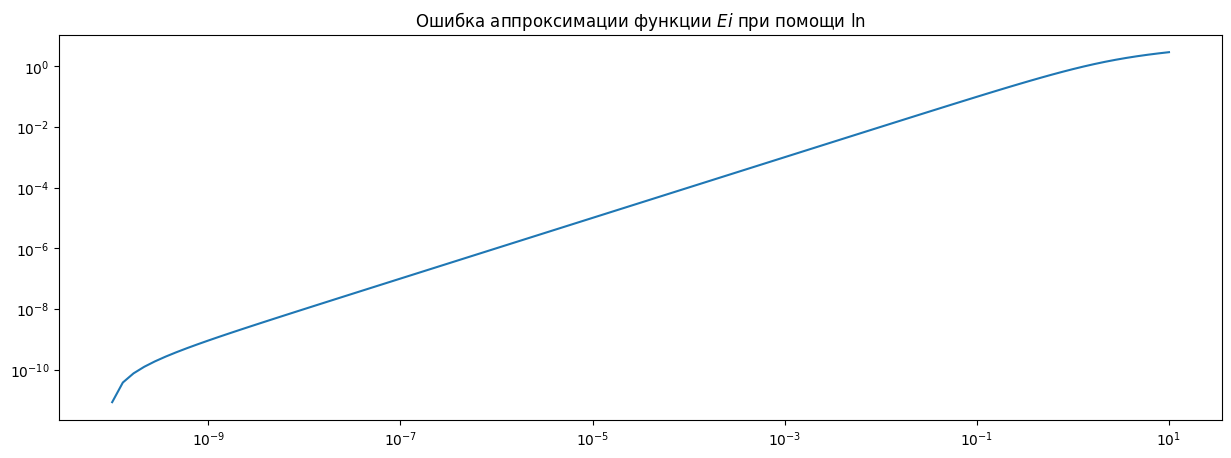

величина аргумента x = 1.01e-05 дает ошибку аппроксимации около 1.0099882965519669e-05


In [4]:
x = np.logspace(-10, 1, 100)

plt.rcParams["figure.figsize"] = (15,5)
fig, (ax1) = plt.subplots(1, 1)
ax1.plot(x, np.log(x) + 0.57721566481 - sc.expi(-x))
ax1.set_xscale('log')
ax1.set_yscale('log')
#ax1.set_ylim(1e-20, 1)
ax1.set_title('Ошибка аппроксимации функции $Ei$ при помощи $\ln$')

x = 1.01e-5
plt.show()
print('величина аргумента x = {} дает ошибку аппроксимации около {}'.format(x, np.log(x) + 0.57721566481 - sc.expi(-x)))